In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from configfile import weatherapikey

In [2]:
weather_api_key = weatherapikey

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
coordinates

[(83.98359932641392, 24.672189205973922),
 (-87.75009562283698, -145.15801855853502),
 (43.35641338138166, -63.56874522067419),
 (2.0047853891969964, -138.59845235399303),
 (-67.53220381263588, 96.94704177747269),
 (67.23367407103558, -38.13909605315828),
 (26.436749021483237, -13.311110626449022),
 (-70.16381385172721, 6.945179113895335),
 (-86.55326556491366, -178.33759042162845),
 (-21.29774091274861, 78.16897056582286),
 (-88.30750646059404, -100.72129437274971),
 (70.49509612484076, 58.510613395940226),
 (37.861184339666366, 117.62903384301211),
 (32.75794926741848, -157.45096183735055),
 (-43.86546213066679, 9.199389294442142),
 (-5.039458826442001, -12.362053498084379),
 (81.95589884706175, 21.717878449408033),
 (24.865522013785977, 57.58034614075481),
 (53.16296959752566, -129.4138371306343),
 (-5.585357649188381, 142.3697376176296),
 (-6.259773656772381, 36.4698378686405),
 (-52.29475379447072, 84.69625498419384),
 (76.42738658322367, -33.02151334706369),
 (54.07232979766317, 

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | longyearbyen
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | lunenburg
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | tasiilaq
Processing Record 7 of Set 1 | puerto del rosario
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | amderma
City not found. Skipping...
Processing Record 13 of Set 1 | binzhou
Processing Record 14 of Set 1 | kapaa
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | georgetown
Processing Record 17 of Set 1 | ruwi
Processing Record 18 of Set 1 | kitimat
Processing Record 19 of Set 1 | tari
Processing Record 20 of Set 1 | kongwa
Processing Record 21 of Set 1 | vestmannaeyjar
Processing 

Processing Record 35 of Set 4 | souillac
Processing Record 36 of Set 4 | alzamay
Processing Record 37 of Set 4 | esperance
Processing Record 38 of Set 4 | moulins
Processing Record 39 of Set 4 | barbacena
Processing Record 40 of Set 4 | stony brook
Processing Record 41 of Set 4 | karaul
City not found. Skipping...
Processing Record 42 of Set 4 | faanui
Processing Record 43 of Set 4 | artyk
City not found. Skipping...
Processing Record 44 of Set 4 | porto belo
Processing Record 45 of Set 4 | norman wells
Processing Record 46 of Set 4 | waipawa
Processing Record 47 of Set 4 | aswan
Processing Record 48 of Set 4 | wadi musa
Processing Record 49 of Set 4 | ovalle
Processing Record 50 of Set 4 | quarai
Processing Record 1 of Set 5 | litovel
Processing Record 2 of Set 5 | lagoa
Processing Record 3 of Set 5 | alenquer
Processing Record 4 of Set 5 | luderitz
Processing Record 5 of Set 5 | thompson
Processing Record 6 of Set 5 | eureka
Processing Record 7 of Set 5 | san ramon
Processing Record 

Processing Record 27 of Set 8 | lulea
Processing Record 28 of Set 8 | san vicente de canete
Processing Record 29 of Set 8 | beringovskiy
Processing Record 30 of Set 8 | qaqortoq
Processing Record 31 of Set 8 | keti bandar
Processing Record 32 of Set 8 | den helder
Processing Record 33 of Set 8 | kochki
Processing Record 34 of Set 8 | vanimo
Processing Record 35 of Set 8 | lafiagi
Processing Record 36 of Set 8 | kavaratti
Processing Record 37 of Set 8 | arman
Processing Record 38 of Set 8 | ayr
Processing Record 39 of Set 8 | aneho
Processing Record 40 of Set 8 | cidreira
Processing Record 41 of Set 8 | salalah
Processing Record 42 of Set 8 | seoul
Processing Record 43 of Set 8 | manta
Processing Record 44 of Set 8 | banjar
Processing Record 45 of Set 8 | lakes entrance
Processing Record 46 of Set 8 | saleaula
City not found. Skipping...
Processing Record 47 of Set 8 | tuatapere
Processing Record 48 of Set 8 | comodoro rivadavia
Processing Record 49 of Set 8 | kawalu
Processing Record 5

Processing Record 19 of Set 12 | tilsonburg
City not found. Skipping...
Processing Record 20 of Set 12 | chaman
Processing Record 21 of Set 12 | adrar
Processing Record 22 of Set 12 | port-cartier
Processing Record 23 of Set 12 | ormara
Processing Record 24 of Set 12 | aldan
Processing Record 25 of Set 12 | awjilah
Processing Record 26 of Set 12 | kormilovka
Processing Record 27 of Set 12 | borovoy
Processing Record 28 of Set 12 | asosa
Processing Record 29 of Set 12 | murovane
Processing Record 30 of Set 12 | matagami
Processing Record 31 of Set 12 | prachuap khiri khan
Processing Record 32 of Set 12 | anadyr
Processing Record 33 of Set 12 | teguldet
Processing Record 34 of Set 12 | san juan
Processing Record 35 of Set 12 | privolzhsk
Processing Record 36 of Set 12 | ankazoabo
Processing Record 37 of Set 12 | leningradskiy
Processing Record 38 of Set 12 | oranjemund
Processing Record 39 of Set 12 | charters towers
Processing Record 40 of Set 12 | mankovo-kalitvenskoye
City not found. 

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Longyearbyen,78.2186,15.6401,42.64,93,90,8.05,SJ,2021-07-29 02:08:27
1,Mataura,-46.1927,168.8643,57.47,73,76,4.65,NZ,2021-07-29 02:08:28
2,Lunenburg,44.3835,-64.3155,58.48,83,0,10.16,CA,2021-07-29 02:08:28
3,Atuona,-9.8000,-139.0333,77.45,67,36,17.47,PF,2021-07-29 02:08:28
4,Busselton,-33.6500,115.3333,62.04,76,47,26.40,AU,2021-07-29 02:08:28
5,Tasiilaq,65.6145,-37.6368,44.76,67,84,5.99,GL,2021-07-29 02:08:29
6,Puerto Del Rosario,28.5004,-13.8627,71.35,78,45,16.11,ES,2021-07-29 02:08:29
7,Hermanus,-34.4187,19.2345,59.81,69,98,23.89,ZA,2021-07-29 02:08:29
8,Vaini,-21.2000,-175.2000,75.36,73,20,10.36,TO,2021-07-29 02:08:30
9,Punta Arenas,-53.1500,-70.9167,48.31,66,75,12.66,CL,2021-07-29 02:08:30


In [12]:
new_column_order=["City","Country","Date","Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

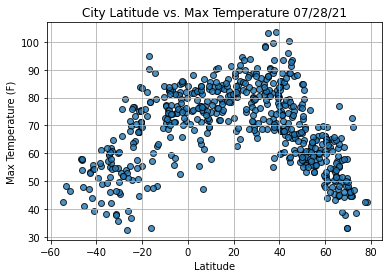

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

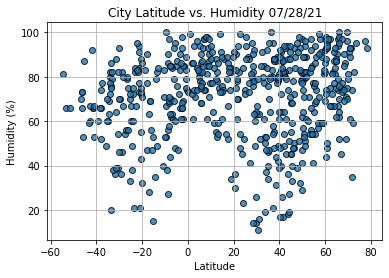

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

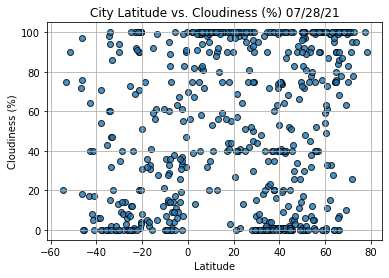

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

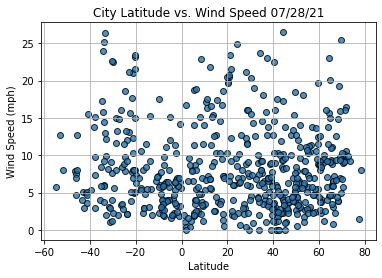

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [37]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

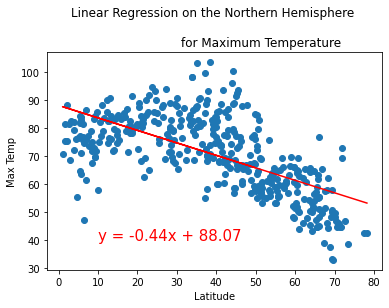

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       """Linear Regression on the Northern Hemisphere \n
                        for Maximum Temperature""", 'Max Temp',(10,40))

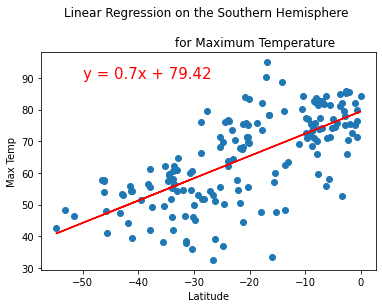

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       """Linear Regression on the Southern Hemisphere \n
                        for Maximum Temperature""", 'Max Temp',(-50,90))

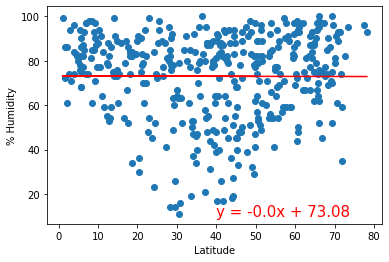

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

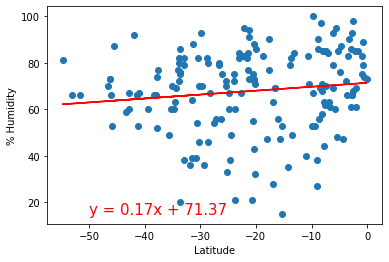

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', 
                       '% Humidity',(-50,15))

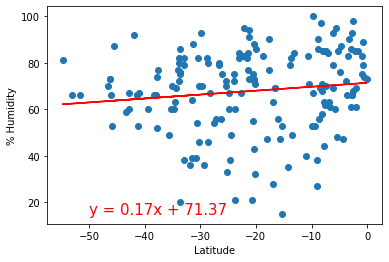

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       """Linear Regression on the Southern Hemisphere \n
                        for % Humidity""", '% Humidity',(-50,15))

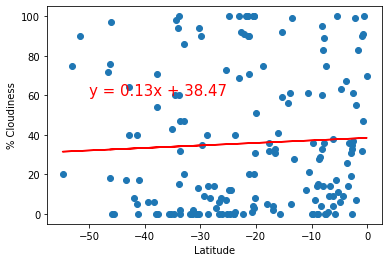

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       """Linear Regression on the Southern Hemisphere \n
                        for % Cloudiness""", '% Cloudiness',(-50,60))

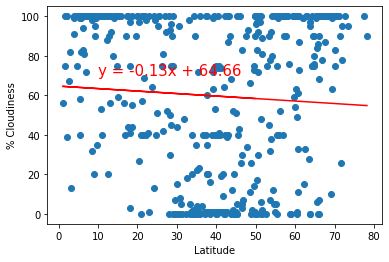

In [33]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       """Linear Regression on the Northern Hemisphere \n
                        for % Cloudiness""", '% Cloudiness',(10,70))

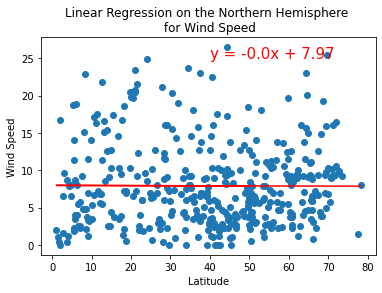

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n for Wind Speed", 'Wind Speed',(40,25))

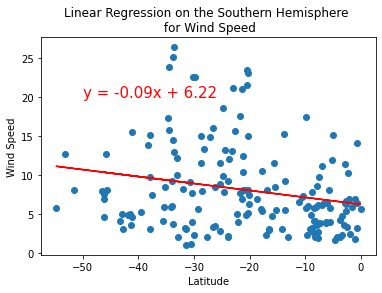

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 
                       'Wind Speed',(-50,20))